In [82]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import glob
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from natsort import natsorted, ns
from sklearn.model_selection import train_test_split
                                                
                                             #1. ~ 3. Min-Max Normalization
obj10 = []

image_data = glob.glob('./coil-20-proc/*.png')

image_data=natsorted(image_data, reverse=False)

for img in image_data:
    grayImg = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    arr = np.array(grayImg)
    dst = cv2.resize(arr, dsize=(64, 64), interpolation=cv2.INTER_LINEAR)
    norm = preprocessing.minmax_scale(dst, axis=0).reshape(1,64*64)
    obj10.append(norm[0])
    
obj10 = np.array(obj10)
                                                        

In [83]:
                                               #4. Split data into Train/Test
train_img = []
test_img = []

for i in range(0, 20):
    data = obj10[i*72:(i+1)*72]
    train, test = train_test_split(data, test_size = 0.5)
    for j in range(36):
        train_img.append(train[j])
        test_img.append(test[j])
    
train_img = np.array(train_img)
test_img = np.array(test_img)
                                                       

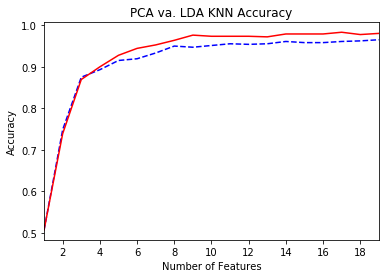

In [84]:
Y = []
PCA_accuracy = []
LDA_accuracy = []

for i in range(20):
    for j in range(36):
        Y.append(i+1)
        
Y = np.array(Y)
                                               #5. Feature Extraction (PCA, LDA)
for dim in range(1,20):
    pca = PCA(n_components=dim)
    pca.fit(train_img)
    Xpca = pca.transform(train_img)
            
    lda = LinearDiscriminantAnalysis(n_components=dim)
    lda.fit(Xpca, Y)
    Xlda = lda.transform(Xpca)
                          
                                               #6. Classification KNN
    
    neigh = KNeighborsClassifier(n_neighbors=7)
    neigh.fit(Xpca, Y) 
    accu = neigh.score(Xpca, Y)                                   # Compute PCA accuracy 
    #print("dim = %d" % dim)
    #print('PDA accuracy {0:6.2f}% (K={1:})'.format((accu) * 100, 7))
    
    neigh2 = KNeighborsClassifier(n_neighbors=7)  
    neigh2.fit(Xlda, Y)  # Train K-NN
    accu2 = neigh2.score(Xlda, Y)                                 # Compute LDA accuracy
    #print('LDA accuracy {0:6.2f}% (K={1:})\n'.format((accu2) * 100, 7))
           
    PCA_accuracy.append(accu)
    LDA_accuracy.append(accu2)
    
                                               #7. Visualization
    
t1 = pd.Series(PCA_accuracy, index=np.array(range(1,20)))
t2 = pd.Series(LDA_accuracy, index=np.array(range(1,20)))
t1.plot(color='b',linestyle='--')
t2.plot(color='r')
plt.title('PCA va. LDA KNN Accuracy')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.show()